<a href="https://colab.research.google.com/github/pastoril10/PrecoVendaAp_Regressao/blob/main/Pre%C3%A7oVendaAp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preço de vendas de apartamentos - Coreia do Sul

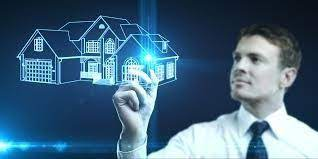

## Dicionario de dados

* Coluna HallwayType (tipo de corredor)

  0 - Corridor

  1 - Mixed

  2 - Terraced

* Coluna HeatingType (Tipo de aquecimento)

  0 - central_heating 

  1 - central_heating 

* Coluna AptManageType  (Tipo de gerenciamento de apt)

  0 - management_in_trust    
  1 - self_management         

* Coluna TimeToBusStop

  2 - 0 ~ 5min         
  1 - 5min ~ 10min     
  0 - 10min ~ 15min      

* Coluna TimeToSubway

  4 - 0 ~ 5min                
  3 - 5min ~ 10min            
  2 - 15min ~ 20min            
  1 - 10min ~ 15min            
  0 - no_bus_stop_nearby     

* Coluna SubwayStation

  7 - Kyungbuk_uni_hospital   
  6 - Myung-duk                
  5 - Banwoldang                
  4 - Bangoge                   
  3 - Sin-nam                  
  2 - no_subway_nearby          
  1 - Chil-sung-market          
  0 - Daegu                      


## 1. Importando bibliotecas

In [200]:
import pandas as pd
import numpy as np

#bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

#biblioteca de processamento
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

#Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Importação e as primeiras informações sobre os dados

In [201]:
#Importando o conjunto de dados
df = pd.read_csv("Daegu_Real_Estate_data.csv")

In [202]:
#Visualizando os primeiros dados do nosso conjunto 
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [203]:
df.shape
#São 5891 linhas e 30 colunas

(5891, 30)

In [204]:
#informações iniciais sobre quais são as colunas, os tipos e se existem dados faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [205]:
#Não temos dados faltantes!!
df.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [206]:
#Quais são as nossas colunas
df.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

### 2.1. Encontrando as colunas do tipo object

In [207]:
#Pensando já na criação dos modelos de predição, devemos selecionar as colunas "Object" onde vamos transformas em numérico
col_obj = []
for i in df.columns:
  if df[i].dtype == "O":
    col_obj.append(i)

In [208]:
#Colunas do tipo object
col_obj

['HallwayType',
 'HeatingType',
 'AptManageType',
 'TimeToBusStop',
 'TimeToSubway',
 'SubwayStation']

### 2.2. Vamos analisar coluna a coluna do tipo "object"

Vamos analisar coluna a coluna para mondar o nosso dicionario de dados

In [209]:
df['HallwayType'].unique()

array(['terraced', 'corridor', 'mixed'], dtype=object)

In [210]:
df['HallwayType'].value_counts()

terraced    3564
mixed       1690
corridor     637
Name: HallwayType, dtype: int64

In [211]:
df['HeatingType'].unique()

array(['individual_heating', 'central_heating'], dtype=object)

In [212]:
df['HeatingType'].value_counts()

individual_heating    5591
central_heating        300
Name: HeatingType, dtype: int64

In [213]:
df['AptManageType'].unique()

array(['management_in_trust', 'self_management'], dtype=object)

In [214]:
df['AptManageType'].value_counts()

management_in_trust    5542
self_management         349
Name: AptManageType, dtype: int64

In [215]:
df['TimeToBusStop'].unique()

array(['5min~10min', '0~5min', '10min~15min'], dtype=object)

In [216]:
df['TimeToBusStop'].value_counts()

0~5min         4509
5min~10min     1327
10min~15min      55
Name: TimeToBusStop, dtype: int64

In [217]:
df['TimeToSubway'].unique()

array(['10min~15min', '5min~10min', '0-5min', '15min~20min',
       'no_bus_stop_nearby'], dtype=object)

In [218]:
df['TimeToSubway'].value_counts()

0-5min                2759
5min~10min            1135
15min~20min            953
10min~15min            806
no_bus_stop_nearby     238
Name: TimeToSubway, dtype: int64

In [219]:
df['SubwayStation'].unique()

array(['Kyungbuk_uni_hospital', 'Daegu', 'Sin-nam', 'Myung-duk',
       'Chil-sung-market', 'Bangoge', 'Banwoldang', 'no_subway_nearby'],
      dtype=object)

In [220]:
df['SubwayStation'].value_counts()

Kyungbuk_uni_hospital    1644
Myung-duk                1507
Banwoldang                748
Bangoge                   737
Sin-nam                   651
no_subway_nearby          404
Chil-sung-market          115
Daegu                      85
Name: SubwayStation, dtype: int64

### 2.3. Tranformando as colunas - Usando LabelEncoder

In [221]:
#Fazendo uma copia do nosso data frame
df2 = df.copy()

In [222]:
#Usando o LabelEncoder para transformar as colunas do tipo objeto para numérico
le = preprocessing.LabelEncoder()

for i in col_obj:
  df2[i] = le.fit_transform(df2[i])

### 2.4. Correlação entre as variaveis

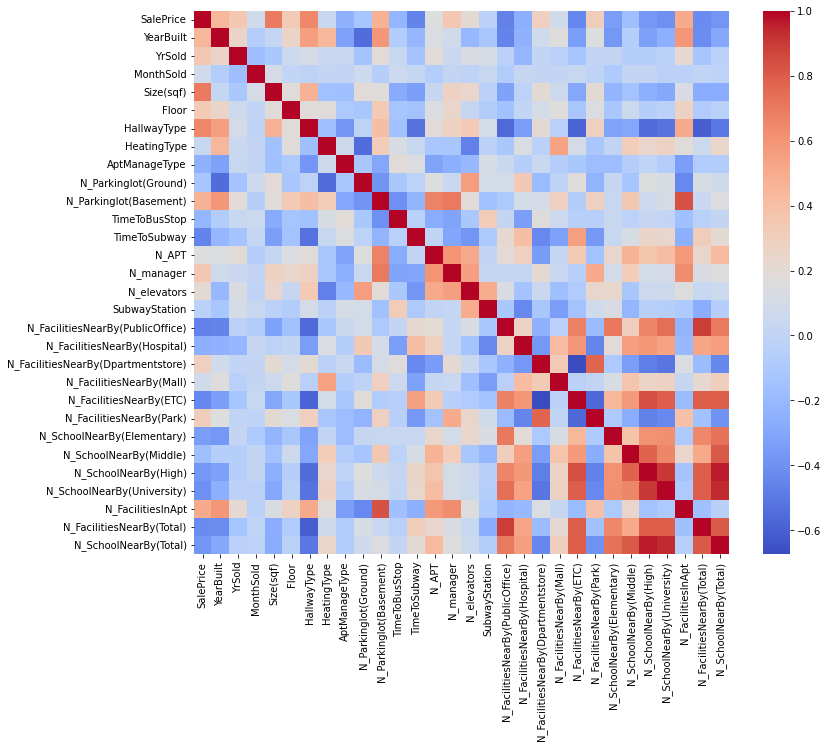

In [223]:
#Criando um mapa de calor com a correlção entre as variaveis
fig, ax = plt.subplots(figsize=(12,10))
corr = df2.corr()
sns.heatmap(corr, cmap="coolwarm")

In [224]:
#Identificando quais são as colunas que contribuem mais para o preço de venda
corr.iloc[0].sort_values(ascending = False)

SalePrice                             1.000000
Size(sqf)                             0.697199
HallwayType                           0.651601
N_FacilitiesInApt                     0.505282
N_Parkinglot(Basement)                0.473252
YearBuilt                             0.447875
N_manager                             0.358329
YrSold                                0.357682
Floor                                 0.336729
N_FacilitiesNearBy(Park)              0.310906
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_elevators                           0.208248
N_APT                                 0.162684
N_FacilitiesNearBy(Mall)              0.082979
MonthSold                             0.081924
HeatingType                           0.034925
SubwayStation                        -0.027520
N_Parkinglot(Ground)                 -0.130549
N_SchoolNearBy(Middle)               -0.166439
TimeToBusStop                        -0.220131
AptManageType                        -0.241174
N_FacilitiesN

## 3. Aplicando modelos de Machine Learning em nossos dados

### 3.1 Preparando os dados 

Selecionando X e y

In [225]:
#Lembrando que em y temos a coluna que queremos prever
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

In [226]:
#Verificando x
X

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,2006,2007,8,814,3,2,1,0,111.0,184.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,1985,2007,8,587,8,0,1,1,80.0,76.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,1985,2007,8,587,6,0,1,1,80.0,76.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,2006,2007,8,2056,8,2,1,0,249.0,536.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,1993,2007,8,1761,3,1,1,0,523.0,536.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,2007,2017,8,1643,19,2,1,0,0.0,1270.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,2006,2017,8,903,13,2,1,0,123.0,181.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,2007,2017,8,868,20,2,1,0,0.0,1270.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,1978,2017,8,1327,1,0,1,1,87.0,0.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [227]:
X.shape

(5891, 29)

In [228]:
y.shape

(5891,)

### 3.2 Criando os dados de treino e de teste - Usando train_test_split

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.3 Modelos a serem utilizando e criação da função para testar os modelos

In [230]:
models = {"KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBoost": xgb.XGBRegressor()}

In [231]:
models

{'DecisionTree': DecisionTreeRegressor(),
 'KNN': KNeighborsRegressor(),
 'LinearRegression': LinearRegression(),
 'RandomForest': RandomForestRegressor(),
 'XGBoost': XGBRegressor()}

In [232]:
#Criando uma função para criar cada modelo, fazer o fit e o score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(123)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

### 3.4 Testando os modelos - Usando a função fit_and_score criada

In [233]:
#Passando o parametros para a nossa função
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train= y_train, 
                             y_test= y_test)

[20:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [234]:
#Verificando o score de cada modelo
model_scores

{'DecisionTree': 0.9593761529297832,
 'KNN': 0.9158838507571843,
 'LinearRegression': 0.8722194617982316,
 'RandomForest': 0.9762346310640219,
 'XGBoost': 0.9663293608734643}

In [235]:
#Criando um dataframe com os retornos de cada modelo
com_model = pd.DataFrame(list(model_scores.items()),
                         columns = ["Model", "Accuracy"])

com_model

,Model,Accuracy
0,KNN,0.915884
1,RandomForest,0.976235
2,DecisionTree,0.959376
3,LinearRegression,0.872219
4,XGBoost,0.966329


In [236]:
fig = px.bar(com_model, 
             x = "Model", 
             y = "Accuracy",
             title = "Accuracy of each model")
fig.show()

## 4. Selecionando o modelo de maior precisão - RandomForestRegressor

Agora vamos fazer uma validação do modelo 

### 4.1. Criando novamente o modelo

In [237]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [238]:
#Parametros utilizados - default
RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [239]:
preds = RFR.predict(X_test)

In [240]:
RFR.score(X_test, y_test)

0.9766662079156753

### 4.2. Mean absolute error (MAE)

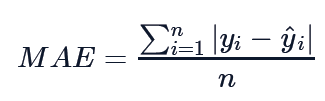


In [241]:
mae = mean_absolute_error(y_test, preds)

In [242]:
print('Root Mean absolute error: %.3f' % mae)

Root Mean absolute error: 9783.309


### 4.3. Mean squared error (MSE)

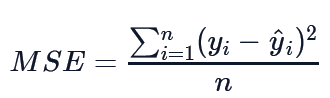

In [243]:
mse = mean_squared_error(y_test, preds)

In [244]:
print ("Root Mean squared error : %.3f" % mse)

Root Mean squared error : 246641052.024


### 4.4. Validação cruzada  

In [245]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer

In [246]:
mse = make_scorer(mean_absolute_error)

In [247]:
cv_results = cross_val_score(RFR, X_train, y_train, cv=5, scoring=mse)

In [248]:
print(cv_results)

[ 9464.70894601 10087.04208834  9406.6195617   9267.50216866
 10244.47294571]


In [249]:
print('The mean:  %.3f'% cv_results.mean())
print('The std:  %.3f'%cv_results.std())

The mean:  9694.069
The std:  393.590


### 4.5. Visualização

#### 4.5.1. Predicted value/actual value

In [250]:
fig = go.Scatter(x = preds, 
                 y =  y_test,
                 mode = "markers",
                 marker = {"color":"red",
                              "line": {'width': 1,
                                      'color': '#c0392b'}},
                 opacity=.8)
                 

layout = go.Layout(title= "Predicted value/actual value",
                   yaxis = {"title": "Real value"},
                   xaxis = {"title":"Predicted value"})

data = [fig]

figura = go.Figure(data = data, layout = layout)

py.iplot(figura)

In [251]:
#Casas com preço abaixo de 300k
len(df[df["SalePrice"] < 300000])/len(df)

0.7710066202682058

É póssivel verificar que o modelo performa melhor nos preços das casas abaixo de 300k, o que equivale a 77% dos nossos dados

#### 4.5.2 Rank of features affect on apartment price

In [252]:
for i, item in enumerate(RFR.feature_importances_):
  print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

YearBuilt: 0.05
YrSold: 0.17
MonthSold: 0.01
Size(sqf): 0.43
Floor: 0.01
HallwayType: 0.21
HeatingType: 0.00
AptManageType: 0.00
N_Parkinglot(Ground): 0.04
N_Parkinglot(Basement): 0.02
TimeToBusStop: 0.00
TimeToSubway: 0.00
N_APT: 0.01
N_manager: 0.00
N_elevators: 0.00
SubwayStation: 0.00
N_FacilitiesNearBy(PublicOffice): 0.00
N_FacilitiesNearBy(Hospital): 0.00
N_FacilitiesNearBy(Dpartmentstore): 0.00
N_FacilitiesNearBy(Mall): 0.00
N_FacilitiesNearBy(ETC): 0.03
N_FacilitiesNearBy(Park): 0.00
N_SchoolNearBy(Elementary): 0.00
N_SchoolNearBy(Middle): 0.00
N_SchoolNearBy(High): 0.00
N_SchoolNearBy(University): 0.00
N_FacilitiesInApt: 0.01
N_FacilitiesNearBy(Total): 0.00
N_SchoolNearBy(Total): 0.00


In [253]:
#Criando dataframe com as features e a porcentagem da sua contribuição para o preço do imóvel
feature = []
values = []
for i, item in enumerate(RFR.feature_importances_):
  feature.append(X_train.columns[i])
  values.append(item*100)


var_import = pd.DataFrame(zip(feature, values), 
                          columns = ["Feature", "Values (%)"])

In [254]:
var_import = var_import.sort_values("Values (%)", 
                       ascending = False)
var_import.set_index("Feature", inplace = True)
var_import

,Values (%)
Feature,
Size(sqf),43.062968
HallwayType,20.864338
YrSold,16.576512
YearBuilt,4.878842
N_Parkinglot(Ground),4.279567
N_FacilitiesNearBy(ETC),2.742794
N_Parkinglot(Basement),1.679140
N_FacilitiesInApt,1.147170
Floor,1.105564


In [255]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x = var_import.index[0:10], 
                y =  var_import["Values (%)"],
                marker = {"color":"Green",
                              "line": {'width': 1,
                                      'color': '#c0392b'}})


layout = go.Layout(title= "Top 10 - Rank of features affect on apartment price",
                   yaxis = {"title": "(%)"},
                   xaxis = {"title":"Features"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)